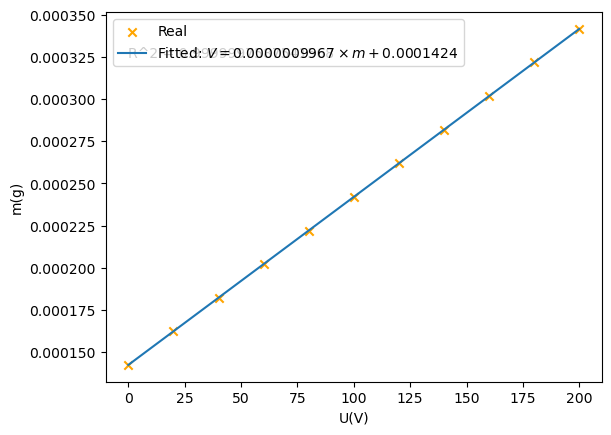

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

m1 = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], dtype = np.int32)

V1 = np.array([1.424, 1.623, 1.822, 2.021, 2.221, 2.420, 2.620, 2.819, 3.018, 3.218, 3.417], dtype = np.float64) * 1e-4

slope, intercept, rvalue, pvalue, stde = linregress(m1, V1)

def m2V(m):
    return m*slope + intercept

def V2m(V):
    return (V - intercept) / slope

def dV2dm(dV):
    return dV / slope

plt.xlabel("U(V)")
plt.ylabel("m(g)")
plt.scatter(m1, V1, marker='x', label="Real", color='orange')
plt.plot(m1, m2V(m1), label=f"Fitted: $V = {slope:.10f}\\times m + {intercept:.7f}$")
plt.text(0, 0.000325, f'R^2 = {rvalue**2}')
plt.legend()
plt.show()

In [2]:
V2 = 1.604e-4
V3 = 2.008e-4
m2 = V2m(V2)
m3 = V2m(V3)
print(f"m2 = {m2}, m3 = {m3}")

m2 = 18.10470631156511, m3 = 58.637358628237855


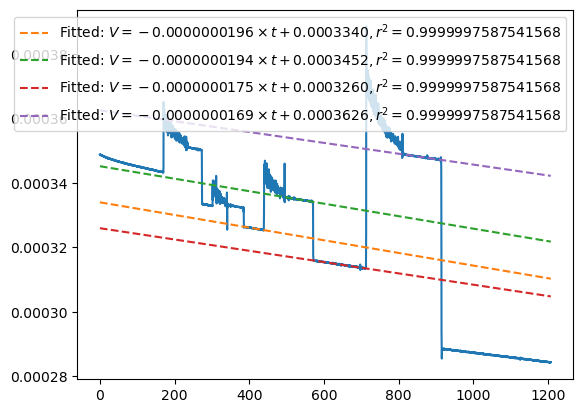

In [3]:
from matplotlib.widgets import SpanSelector
from numpy import ndarray
from sympy import plot


df1 = pd.read_csv("yedan.txt", sep='\t', header=0)
t1 = df1['Time']
v1 = df1['Voltage']

fig, ax = plt.subplots()
line, = ax.plot(t1, v1)

def plotLine(x: ndarray, y, xmin, xmax, ax):
    start, end = np.searchsorted(x, (xmin, xmax))
    xt = x[start:end]
    yt = y[start:end]
    slope, intercept, r_value, p_value, std_err = linregress(xt, yt)
    ax.plot(x, x*slope + intercept, '--', label = f'Fitted: $V = {slope:.10f}\\times t + {intercept:.7f}, r^2 = {rvalue**2}$')
    return slope, intercept

k1, b1 = plotLine(t1, v1, 400, 420, ax)
k2, b2 = plotLine(t1, v1, 520, 550, ax)
k3, b3 = plotLine(t1, v1, 590, 700, ax)
k4, b4 = plotLine(t1, v1, 820, 890, ax)
ax.legend()
plt.show()

In [4]:
def calcdm(b1, b2, m):
    return m - V2m(b2) + V2m(b1)

dm1 = calcdm(b1, b2, m2)
dm2 = calcdm(b3, b4, m3)

print("dm1:", dm1, "dm2:", dm2)

dm1: 6.854840165753927 dm2: 21.92303481498348


### 焓差法

In [5]:
dH = 79.6 - 6.02
L1 = dH * m2 / dm1
L2 = dH * m3 / dm2
print("L1 = ", L1, "L2 = ", L2, "dH = ", dH)

L1 =  194.3363022613154 L2 =  196.80381317083595 dH =  73.58


In [6]:
cp = pd.read_csv("cp.csv")

In [7]:
Tp = cp['T'].to_numpy(dtype = np.int32)
Cp = cp['Cp'].to_numpy(dtype = np.float64)
p = 0
dQ = 0
for i in range(78, 24 + 273):
    if p < len(Tp)-1 and abs(Tp[p] - i) > abs(Tp[p+1] - i):
        p += 1
    dQ += Cp[p]
L3 = m2 * dQ / dm1 / 1000
L4 = m3 * dQ / dm2 / 1000
print("dQ = ", dQ, "L3 = ", L3, "L4 = ", L4)

dQ =  72447.39999999994 L3 =  191.34492830179954 L4 =  193.774457383974


In [8]:
import scipy.constants as const
from scipy.integrate import quad
def debi_U(T, TD):
    target = lambda x: x**3/(np.exp(x) - 1)
    return quad(target, 0, TD/T)[0] * 9 * const.N_A * const.k * T**4 / TD**3

Td = 343
M = 63.54
dQ = debi_U(24.5+273.15, Td) - debi_U(77, Td)
L5 = dQ * m2 / M / dm1
L6 = dQ * m3 / M / dm2
print("dQ = ", dQ, "L5 = ", L5, "L6 = ", L6)

dQ =  4415.546088885621 L5 =  183.54026870097033 L6 =  185.87070110133058


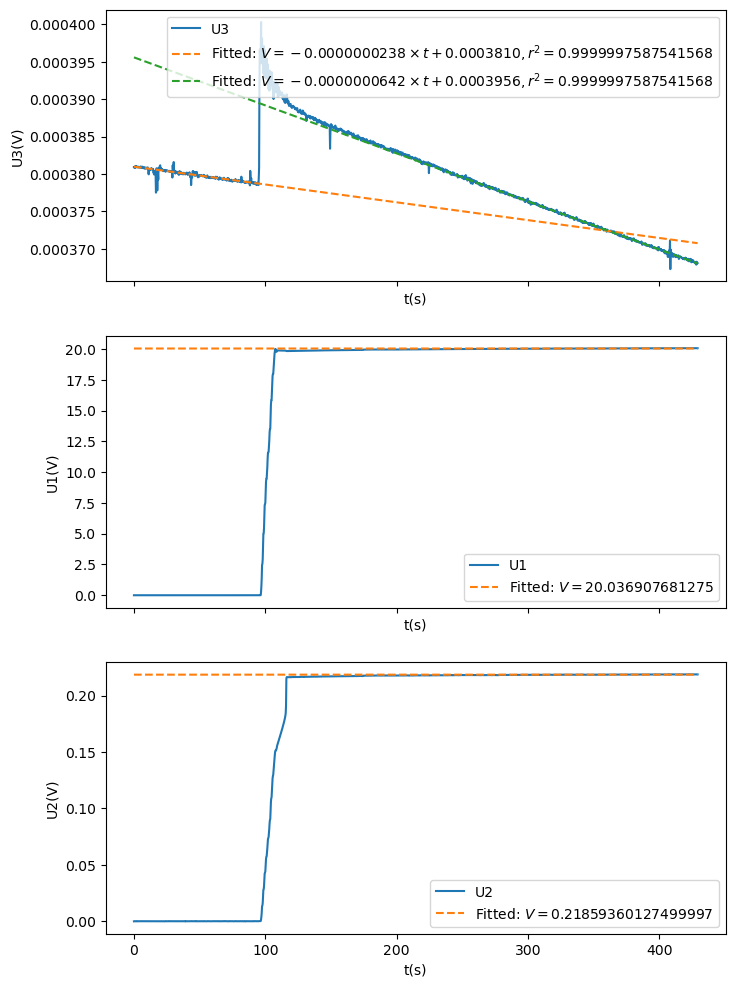

In [9]:
df = pd.read_csv("yedan2.txt", sep='\t')
t = df['时间t']
U1 = df['加热电压']
U2 = df['取样电压']
U3 = df['称重电压']

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(8, 12)
ax1.plot(t, U3, label='U3')
ax2.plot(t, U1, label='U1')
ax3.plot(t, U2, label='U2')
ax1.set_xlabel("t(s)")
ax1.set_ylabel("U3(V)")
ax2.set_xlabel("t(s)")
ax2.set_ylabel("U1(V)")
ax3.set_xlabel("t(s)")
ax3.set_ylabel("U2(V)")
# plt.xlabel("t(s)")
# plt.ylabel("U(V)")
# plt.legend()

def plotHorizontalLine(x, y, xmin, xmax, ax):
    start, end = np.searchsorted(x, (xmin, xmax))
    yt = y[start:end]
    avg = np.mean(yt)
    ax.plot(x, np.full_like(x, avg), '--', label = f'Fitted: $V = {avg}$')
    return avg

k1, b1 = plotLine(t, U3, 30, 90, ax1)
k2, b2 = plotLine(t, U3, 300, 400, ax1)
b3 = plotHorizontalLine(t, U1, 300, 400, ax2)
b4 = plotHorizontalLine(t, U2, 300, 400, ax3)

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

In [10]:
dm1 = dV2dm(k1)
dm2 = dV2dm(k2)
L7 = (b3*b4/0.5) / (dm1 - dm2)
print("dm1=", dm1, "dm2=", dm2, "L7=", L7)
print(b3*b4/0.5)
print(dm1 - dm2)

dm1= -0.023904532081777966 dm2= -0.0643948052858475 L7= 216.3452830456278
8.759879616929222
0.04049027320406953
